# Creating a single event-log

In [1]:
# Install requirements
!pip install numpy pandas pm4py
!brew install graphviz

==> Downloading https://formulae.brew.sh/api/formula.jws.json
######################################################################### 100.0%
==> Downloading https://formulae.brew.sh/api/cask.jws.json
######################################################################### 100.0%
To reinstall 12.0.0, run:
  brew reinstall graphviz


In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [3]:
eventlog_settings = {
                    # number of traces/cases in the event-log
                    "number_of_traces":1000,

                    # level of entropy: min, medium and/or max
                    "process_entropy": "med_entropy",#"min_entropy","med_entropy","max_entropy"

                    # first or higher-order markov chain to represent the transitions "memoryless", "memory"
                    "process_type":"memoryless",

                    # order of the HOMC - only specify this when using process with memory
                    "process_memory":2,

                    # number of activity types
                    "statespace_size":5,
                    
                    # number of transitions - only used for medium entropy (should be higher than 2 and < statespace size)
                    "med_ent_n_transitions":3,
                                    
                    # lambda parameter of inter-arrival times
                    "inter_arrival_time":1.5,
                    
                    # lambda parameter of process noise
                    "process_stability_scale":0.1,
                    
                    # probability of agent being available
                    "resource_availability_p":0.5,

                    # number of agents in the process
                    "resource_availability_n":3,

                    # waiting time in full days, when no agent is available. 0.041 is 15 minutes
                    "resource_availability_m":0.041,
                    
                    # variation between activity durations
                    "activity_duration_lambda_range":1,
                    
                    # business hours definition: when can cases be processed? ()
                    "Deterministic_offset_W":"weekdays",

                    # time-unit for a full week: days = 7, hrs = 24*7, etc.
                    "Deterministic_offset_u":7,

                    # offset for the timestamps used (years after 1970)
                    "datetime_offset":54,

                    # experiment identifier used when storing event-log
                    "idx":0,
                    }

In [4]:
from SynBPS.simulation.simulation_pipeline import generate_eventlog

In [5]:
log = generate_eventlog(eventlog_settings, output_dir="data/")

traces: 1000
eventlog saved to: data/0_Eventlog_med_entropy_memoryless.csv
events: 4083
ids: 1000


In [6]:
log

,caseid,activity,activity_no,y_acc_sum,z_t,n_t,q_t,h_t,b_t,s_t,v_t,u_t,starttime,endtime,arrival_datetime,start_datetime,end_datetime,start_day,start_hour
0,0,b,1,0,2.853989,2.853989,2.948056,0.041,0.053067,0.000000,0.290703,0.384769,2.948056,3.238758,2024-01-04 14:29:44,2024-01-04 16:45:12,2024-01-04 23:43:48,Thursday,16
1,0,c,2,0,2.853989,3.238758,3.756087,0.041,0.476329,0.000000,0.779732,1.297061,3.756087,4.535819,2024-01-04 14:29:44,2024-01-05 12:08:45,2024-01-06 06:51:34,Friday,12
2,0,c,3,0,2.853989,4.535819,4.629252,0.082,0.011433,0.000000,0.341329,0.434762,4.629252,4.970581,2024-01-04 14:29:44,2024-01-06 09:06:07,2024-01-06 17:17:38,Saturday,9
3,0,c,4,0,2.853989,4.970581,5.401705,0.082,0.349123,2.098295,1.394226,3.923645,7.500000,8.894226,2024-01-04 14:29:44,2024-01-09 06:00:00,2024-01-10 15:27:41,Tuesday,6
4,0,c,5,0,2.853989,8.894226,1.962480,0.041,0.027255,0.000000,0.038636,0.106891,8.962480,9.001117,2024-01-04 14:29:44,2024-01-10 17:05:58,2024-01-10 18:01:36,Wednesday,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078,997,c,21,0,1490.382451,1506.229815,1.402758,0.041,0.131943,0.097242,0.515775,0.785960,1506.500000,1507.015775,2028-01-31 03:10:43,2028-02-16 06:00:00,2028-02-16 18:22:42,Wednesday,6
4079,998,c,1,0,1491.016997,1491.016997,0.498627,0.082,0.399629,0.001373,0.753412,1.236415,1491.500000,1492.253412,2028-01-31 18:24:28,2028-02-01 06:00:00,2028-02-02 00:04:54,Tuesday,6
4080,998,c,2,0,1491.016997,1492.253412,1.336139,0.082,0.000727,0.163861,0.504824,0.751411,1492.500000,1493.004824,2028-01-31 18:24:28,2028-02-02 06:00:00,2028-02-02 18:06:56,Wednesday,6
4081,999,c,1,0,1491.894702,1491.894702,1.033566,0.000,0.138864,0.466434,0.069479,0.674778,1492.500000,1492.569479,2028-02-01 15:28:22,2028-02-02 06:00:00,2028-02-02 07:40:02,Wednesday,6


# BPMN model

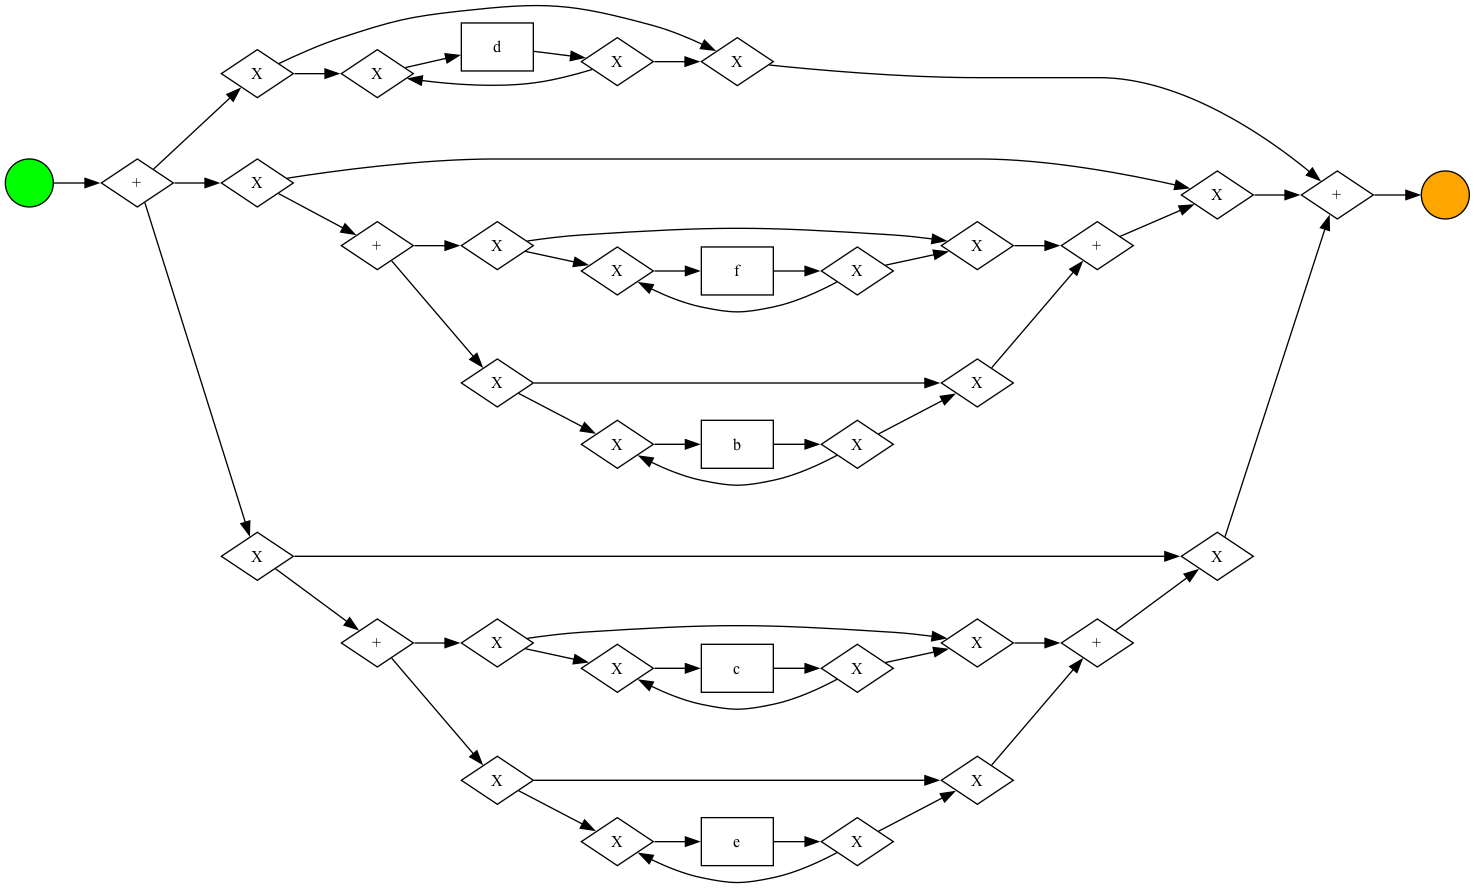

In [7]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer

# Ensure the required columns exist
required_columns = ['caseid', 'activity', 'start_datetime']
for col in required_columns:
    if col not in log.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame")

# Ensure datetime columns are in the correct format
log['start_datetime'] = pd.to_datetime(log['start_datetime'])
log['end_datetime'] = pd.to_datetime(log['end_datetime'])

# Sort the dataframe
log = log.sort_values('start_datetime')

# Convert DataFrame to event log format
dataframe = pm4py.format_dataframe(log, case_id='caseid', activity_key='activity', timestamp_key='start_datetime')
event_log = pm4py.convert_to_event_log(dataframe)

# Discover BPMN model
bpmn_model = pm4py.discover_bpmn_inductive(event_log)

# Visualize the BPMN model
bpmn_gviz = bpmn_visualizer.apply(bpmn_model)

filedest = "data/bpmn_diagram.png"

# Save the diagram as an image file (e.g., PNG)
bpmn_visualizer.save(bpmn_gviz, filedest)

# Display the image in the notebook
from IPython.display import display, Image
display(Image(filename=filedest))

# Variant analysis

Number of variants: 418
Total cases: 1000
Unique variants: 418
Variant coverage (top 5): 38.10%


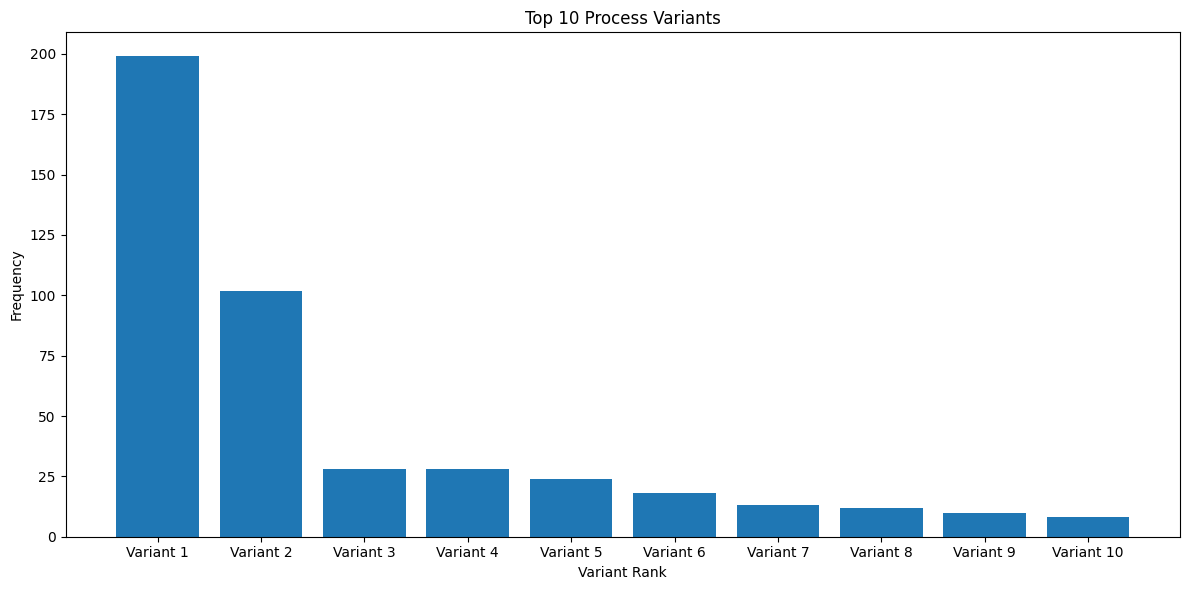


Top 5 most frequent variants:
1. Frequency: 199
   Activities: b

2. Frequency: 102
   Activities: c

3. Frequency: 28
   Activities: c -> c

4. Frequency: 28
   Activities: b -> c

5. Frequency: 24
   Activities: f -> c



In [9]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.filtering.log.variants import variants_filter


# Get process variants
variants = variants_filter.get_variants(event_log)

# Print the number of variants
print(f"Number of variants: {len(variants)}")


import pm4py
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Function to extract activity sequence from a variant
def get_activity_sequence(variant):
    if isinstance(variant, tuple) and len(variant) == 1:
        # Single activity variant
        return variant
    elif isinstance(variant, tuple) and all(isinstance(item, tuple) for item in variant):
        # Multi-activity variant
        return tuple(activity for activity, _ in variant)
    else:
        # Unexpected format, return as is
        return variant

# Extract and count variants
variant_counts = Counter()
for variant, traces in variants.items():
    activity_sequence = get_activity_sequence(variant)
    variant_counts[activity_sequence] = len(traces)

# Convert to DataFrame for easier analysis
df_variants = pd.DataFrame(list(variant_counts.items()), columns=['Variant', 'Frequency'])
df_variants = df_variants.sort_values('Frequency', ascending=False).reset_index(drop=True)

# Calculate some statistics
total_cases = sum(df_variants['Frequency'])
unique_variants = len(df_variants)
top_5_coverage = df_variants['Frequency'].head(5).sum() / total_cases

# Print statistics
print(f"Total cases: {total_cases}")
print(f"Unique variants: {unique_variants}")
print(f"Variant coverage (top 5): {top_5_coverage:.2%}")

# Visualize top 10 variants
plt.figure(figsize=(12, 6))
plt.bar(range(10), df_variants['Frequency'].head(10))
plt.title('Top 10 Process Variants')
plt.xlabel('Variant Rank')
plt.ylabel('Frequency')
plt.xticks(range(10), [f"Variant {i+1}" for i in range(10)])
plt.tight_layout()
plt.show()

# Print details of top 5 variants
print("\nTop 5 most frequent variants:")
for i, (variant, freq) in enumerate(df_variants.head(5).itertuples(index=False), 1):
    print(f"{i}. Frequency: {freq}")
    print(f"   Activities: {' -> '.join(str(v) for v in variant)}")
    print()